# Daily Dose of Data Science

The notebook accompanies the code for creating sparkline plots.

[Sparklines: The Hidden Gem of Data Visualisations That Deserves Much More Attention](https://www.blog.dailydoseofds.com/p/sparklines-the-hidden-gem-of-data)

Author: Avi Chawla

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from base64 import b64encode
from io import BytesIO
from IPython.display import HTML
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('svg')

In [2]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60']

## Dummy data

In [3]:
n = 100

data = [
    ('APPL',   40000*np.random.rand(n).round(2)), 
    ('MSFT',   2000*np.random.rand(n).round(2)), 
    ('GOOG',   500*np.random.rand(n).round(2)),
    ('META',   150*np.random.rand(n).round(2)),
    
]
df = pd.DataFrame(data, columns=['Name', 'Price History'])

## Sparkline in the form of Line Plot

In [4]:
def create_line(data):
    
    data = list(data)
    
    # initialise the plot as you usually would
    fig, ax = plt.subplots(1, 1, figsize=(2, 0.5), facecolor="none")
    
    # add color coding to the line. 
    if data[0]>data[-1]:
        # if latest price is less than open price, make the plot red
        chart_color = colors[0]
        
    else:
        # if the latest price is more than open price, make the plot green
        chart_color = colors[3]
        
    # create a line plot    
    ax.plot(data, color = chart_color)
    
    # turn off axis
    ax.axis('off')
    
    # add a marker at the last data point
    plt.plot(len(data) - 1, data[len(data) - 1], 'b.')
    
    # close the figure
    plt.close(fig)
    
    # create a Bytes object
    img = BytesIO()    
    
    # store the above plot to this Bytes object
    fig.savefig(img, format='png')
    
    # Encode object as base64 byte string
    encoded = b64encode(img.getvalue())
    
    # The above cannote be printed directly. We need to convert it to utf-8 format
    decoded = encoded.decode('utf-8')
    
    # Return the corresponding HTML tag
    return '<img src="data:image/png;base64,{}"/>'.format(decoded)

## Sparkline in the form of Histogram

In [5]:
from base64 import b64encode
from io import BytesIO

def create_hist(data):
    # initialise the plot as you usually would
    fig, ax = plt.subplots(figsize=(2, 0.5), facecolor="none") 
    
    # create a histogram
    ax.hist(data, bins=10, color=colors[2])
    
    # turn off axis
    ax.axis('off')
    
    # close the figure
    plt.close(fig)
    
    # create a Bytes object
    img = BytesIO()
    
    # store the above plot to this Bytes object
    fig.savefig(img)
    
    # Encode object as base64 byte string
    encoded = b64encode(img.getvalue())
    
    # The above cannote be printed directly. We need to convert it to utf-8 format
    decoded = encoded.decode('utf-8')
    
    # Return the corresponding HTML tag
    return f'<img src="data:png;base64,{decoded}">'## Sparkline in the form of Line Plot

## Create Sparkline


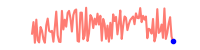
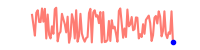
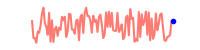
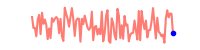

In [6]:
# create line sparkline and store it in a column
df['Day Price History']  = df['Price History'].apply(create_line)

# create histogram sparkline and store it in a column
df['Hourly Trade Volume'] = df['Price History'].apply(create_hist)

# Note: 'Hourly Trade Volume' is just created for demonstration purposes.
# We need time information as well to create that sparkline.

# Print the above dataframe as HTML
HTML(df.drop(columns = ["Price History"]).to_html(escape=False))